In [1]:
# ref: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

import os, sys
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join 

import torch
import torchvision

print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

plt.style.use('bmh')

PyTorch Version:  1.5.1
Torchvision Version:  0.6.1


In [2]:
DataPath = r'D:\GitWork\titanic\data'
TranFile = 'train.csv'
TestFile = 'test.csv'
OutFile  = 'gender_submission.csv'

In [3]:
# Importing the data and displaying some rows
f_abspath = join(DataPath, TranFile)
df_train = pd.read_csv(f_abspath)
print(df_train.info())
display(df_train.head(10))

f_abspath = join(DataPath, TestFile)
df_test = pd.read_csv(f_abspath)
print(df_test.info())
display(df_test.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
# trans sex from string to integer

col_target = 'Sex'
set_sex = sorted(set(df_train[col_target].values))
# print(set_sex)

dict_sex = { set_sex[i]: i for i in range(len(set_sex)) }
dict_sex_bw = { i: set_sex[i] for i in range(len(set_sex)) }
print(dict_sex)

df_train[col_target] = df_train.Sex.map(dict_sex)
print(df_train)

{'female': 0, 'male': 1}
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   

In [5]:
# Convert Ticket from string to number
col_target = 'Ticket'
set_ticket = sorted(set(df_train[col_target].values))
# print(set_ticket)

dict_ticket = { set_ticket[i]: i for i in range(len(set_ticket)) }
dict_ticket_bw = { i: set_ticket[i] for i in range(len(set_ticket)) }
# print(dict_ticket)

df_train[col_target] = df_train.Ticket.map(dict_ticket)
print(df_train)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ...   
886        

In [6]:
df = df_train
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]

del df2['PassengerId']
del df2['Survived']

print("List of dropped columns:", end=" ")
for c in df.columns:
    if c not in df2.columns:
        print(c, end=", ")

df = df2

List of dropped columns: PassengerId, Survived, Cabin, 

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


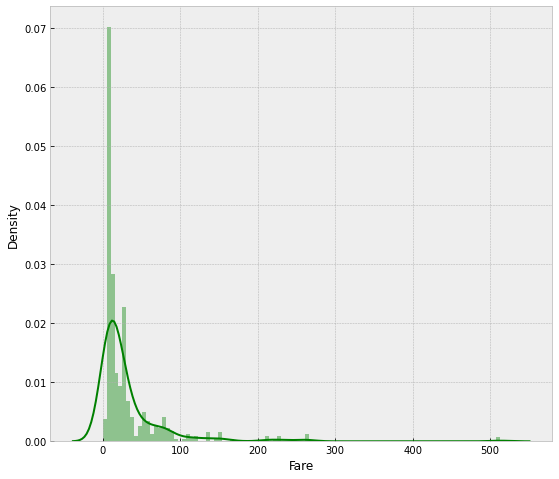

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

col_name = 'Fare'
print(df[col_name].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df[col_name], color='g', bins=100, hist_kws={'alpha': 0.4});

In [8]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [9]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare
0,3,1,22.0,1,0,523,7.2500
1,1,0,38.0,1,0,596,71.2833
2,3,0,26.0,0,0,669,7.9250
3,1,0,35.0,1,0,49,53.1000
4,3,1,35.0,0,0,472,8.0500


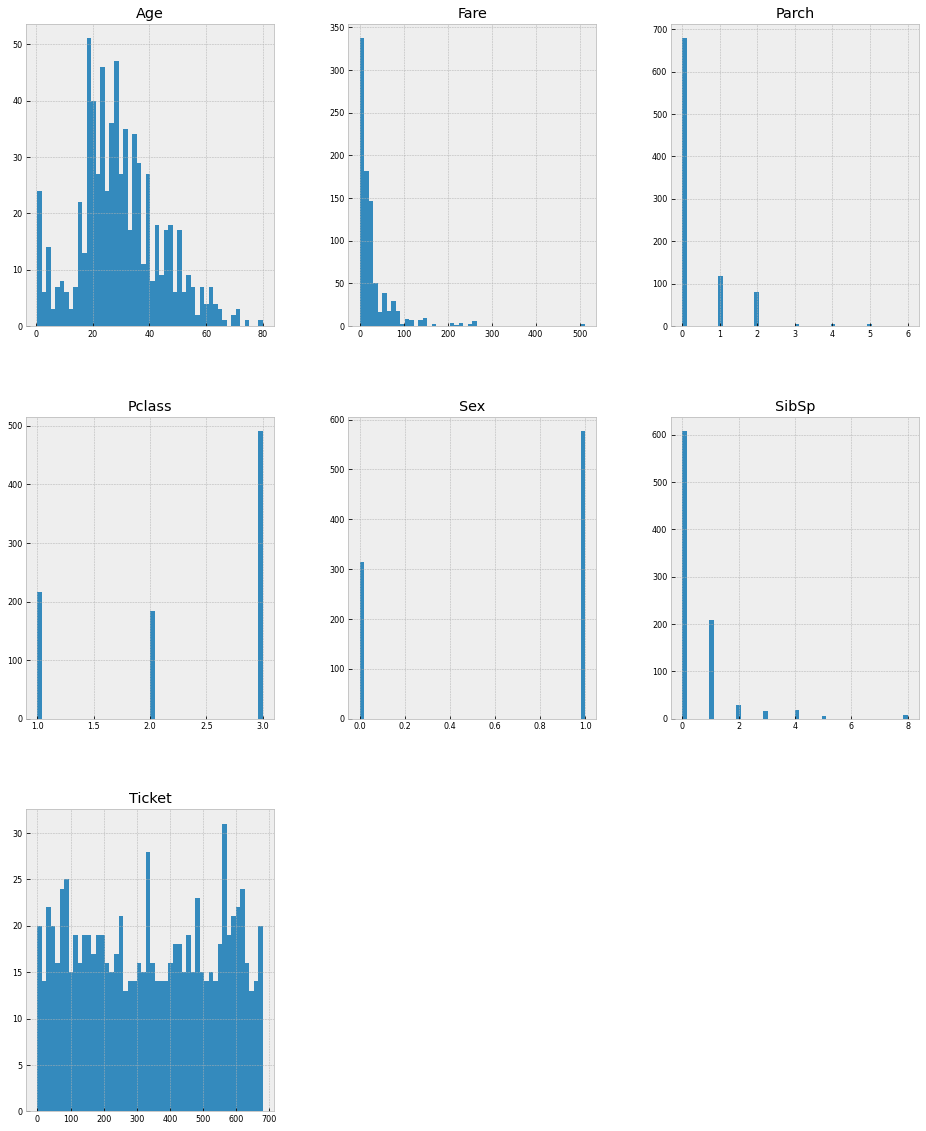

In [10]:
# ; avoid having the matplotlib verbose informations
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

In [11]:
# -1 because the latest row is SalePrice
df_num_corr = df_num.corr()[col_name][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

fmt_str = """
There is {} strongly correlated values with '{}':\n{}
"""
print(fmt_str.format(len(golden_features_list), col_name, golden_features_list))


There is 1 strongly correlated values with 'Fare':
Pclass   -0.5495
Name: Fare, dtype: float64



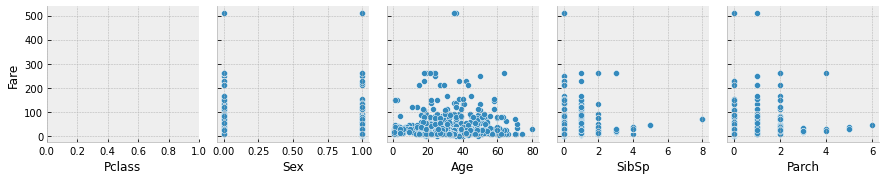

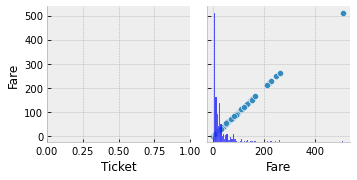

In [12]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=[col_name])

In [13]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], col_name]]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()[col_name][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

         Pclass: -0.5494996199439061
            Sex:             nan
         Ticket: -0.007709569171400818
          Parch: 0.045162585753706276
          SibSp: 0.06831928901064312
            Age: 0.09606669176903881


In [14]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with SalePrice:
['Pclass']


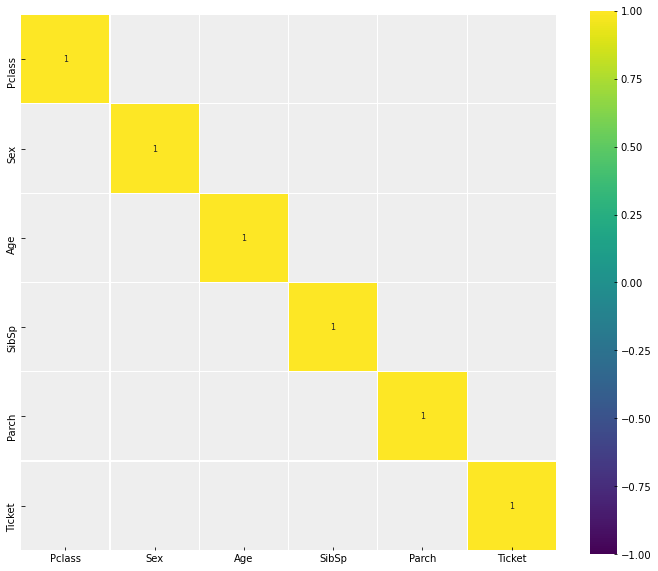

In [15]:
corr = df_num.drop(col_name, axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);